# Import

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

'''Enabling plotting of graphs just below the plotting commands'''
%matplotlib inline
'''Enabling the disply of all rows and columns within the dataframe'''
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Constant

In [2]:
num_feature = 6
num_target = 3
bandwidth = 100
limit = pd.DataFrame({'lower' : [303, 20, 0, 2, 6, 1.5, 122, 1236, 14], \
                     'higher' : [840, 44, 17, 5, 8, 2, 408, 3240, 101], \
                     'ref' : [530, 40, 14, 3.2, 6, 1.8, np.nan, np.nan, np.nan]})

'''Import dataset'''
dataset = pd.read_csv("../Dataset/Choudhury_Dataset.csv")

# Functions

In [3]:
'''
Performing data interpolation onto the input dataset

Parameter:
    dataset: represents the dataset that will be interpolated
    
Return:
    interpolated: represents the dataset that has been interpolated using Gaussian Kernel Regression
'''
def dataset_interpolation(dataset):
    kernel_dt_wk = DotProduct() + WhiteKernel(noise_level = 0.5)
    gaussian_proc_reg = GaussianProcessRegressor(kernel = kernel_dt_wk, random_state = 0)
    features = dataset.iloc[:, 0 : num_feature]
    targets = dataset.iloc[:, num_feature : num_feature + num_target]
    interpolated = pd.DataFrame()
    for i in range(num_feature):
        merge_feature = pd.DataFrame()
        feat = list(range(int(limit.iloc[i][0]), int(limit.iloc[i][1] + 1)))
        feat = pd.DataFrame(feat, columns = ['x_{}'.format(i + 1)])
        for m in range(num_feature):
            if m == i:
                merge_feature = pd.concat([merge_feature, feat], axis = 1)
            if m != i:
                other_feat = pd.DataFrame(np.repeat(limit.iloc[m][2], len(feat)), columns = ['x_{}'.format(m + 1)])
                merge_feature = pd.concat([merge_feature, other_feat], axis = 1)
        merge_target_pred = pd.DataFrame()
        for j in range(num_target):
            x_train = np.array(features.iloc[:, i]).reshape(-1, 1)
            y_train = np.array(targets.iloc[:, j]).reshape(-1, 1)
            gaussian_proc_reg.fit(x_train, y_train)
            x_test = np.array(range(int(limit.iloc[i][0]), int(limit.iloc[i][1]) + 1)).reshape(-1, 1)
            pred_feature, y_pred_SSqr = gaussian_proc_reg.predict(x_test, return_std = True)
            pred_feature = pd.DataFrame(pred_feature, columns = ['y_{}'.format(j + 1)])
            merge_target_pred = pd.concat([merge_target_pred, pred_feature], axis = 1)
        merge_feat_pred = pd.concat([merge_feature, merge_target_pred], axis = 1)
        interpolated = pd.concat([interpolated, merge_feat_pred], axis = 0).reset_index(drop = True)
    return interpolated

# Analysis

In [4]:
'''Interpolation of dataset'''
interpolated_dataset = dataset_interpolation(dataset)
display(interpolated_dataset)

,x_1,x_2,x_3,x_4,x_5,x_6,y_1,y_2,y_3
0,303.0,40.0,14.0,3.2,6.0,1.8,219.403548,2257.138490,41.412817
1,304.0,40.0,14.0,3.2,6.0,1.8,219.534718,2257.496927,41.436875
2,305.0,40.0,14.0,3.2,6.0,1.8,219.665888,2257.855363,41.460932
3,306.0,40.0,14.0,3.2,6.0,1.8,219.797058,2258.213800,41.484990
4,307.0,40.0,14.0,3.2,6.0,1.8,219.928227,2258.572237,41.509047
5,308.0,40.0,14.0,3.2,6.0,1.8,220.059397,2258.930673,41.533104
6,309.0,40.0,14.0,3.2,6.0,1.8,220.190567,2259.289110,41.557162
7,310.0,40.0,14.0,3.2,6.0,1.8,220.321737,2259.647547,41.581219
8,311.0,40.0,14.0,3.2,6.0,1.8,220.452907,2260.005983,41.605277
9,312.0,40.0,14.0,3.2,6.0,1.8,220.584076,2260.364420,41.629334


#  Current Intensity Against All Outputs

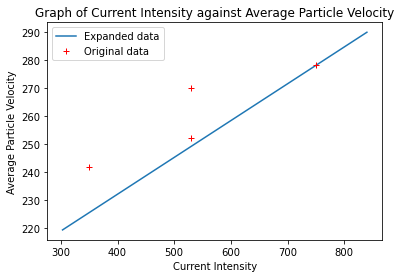

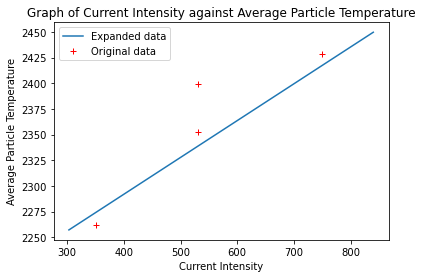

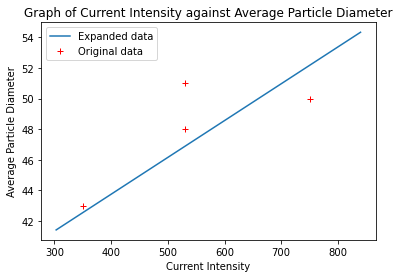

In [5]:
plt.plot(interpolated_dataset.iloc[0 : 538, 0], interpolated_dataset.iloc[0: 538, 6])
plt.plot([350, 530, 750, 530], [242, 270, 278, 252], 'r+')
plt.xlabel("Current Intensity")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Current Intensity against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[0 : 538, 0], interpolated_dataset.iloc[0: 538, 7])
plt.plot([350, 530, 750, 530], [2262, 2399, 2428, 2352], 'r+')
plt.xlabel("Current Intensity")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Current Intensity against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[0 : 538, 0], interpolated_dataset.iloc[0: 538, 8])
plt.plot([350, 530, 750, 530], [43, 51, 50, 48], 'r+')
plt.xlabel("Current Intensity")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Current Intensity against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

#  Argon Gas Flow Rate Against All Outputs

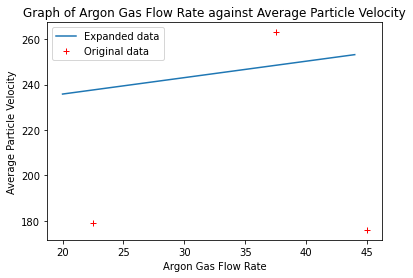

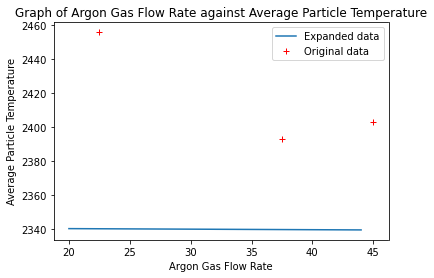

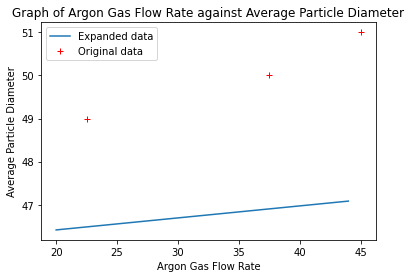

In [6]:
plt.plot(interpolated_dataset.iloc[538: 563, 1], interpolated_dataset.iloc[538: 563, 6])
plt.plot([45, 22.5, 37.5], [176, 179, 263], 'r+')
plt.xlabel("Argon Gas Flow Rate")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Argon Gas Flow Rate against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[538: 563, 1], interpolated_dataset.iloc[538: 563, 7])
plt.plot([45, 22.5, 37.5], [2403, 2456, 2393], 'r+')
plt.xlabel("Argon Gas Flow Rate")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Argon Gas Flow Rate against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[538: 563, 1], interpolated_dataset.iloc[538: 563, 8])
plt.plot([45, 22.5, 37.5], [51, 49, 50], 'r+')
plt.xlabel("Argon Gas Flow Rate")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Argon Gas Flow Rate against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

#  Hydrogen Flow Rate Against All Outputs

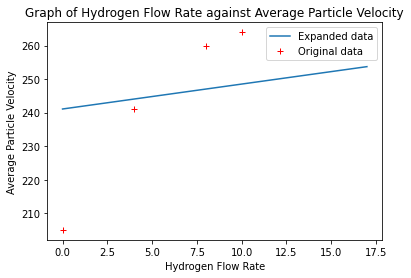

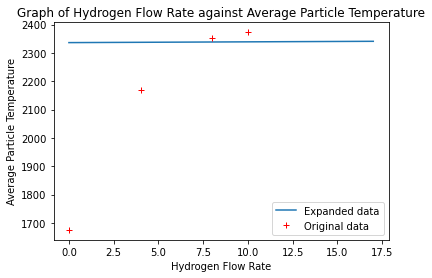

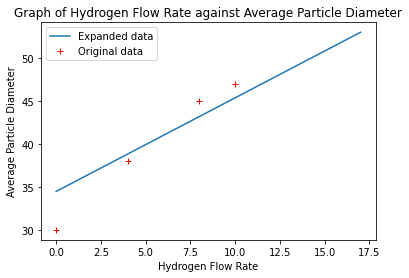

In [7]:
plt.plot(interpolated_dataset.iloc[563: 581, 2], interpolated_dataset.iloc[563: 581, 6])
plt.plot([0, 4, 8, 10], [205, 241, 260, 264], 'r+')
plt.xlabel("Hydrogen Flow Rate")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Hydrogen Flow Rate against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[563: 581, 2], interpolated_dataset.iloc[563: 581, 7])
plt.plot([0, 4, 8, 10], [1675, 2170, 2351, 2373], 'r+')
plt.xlabel("Hydrogen Flow Rate")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Hydrogen Flow Rate against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[563: 581, 2], interpolated_dataset.iloc[563: 581, 8])
plt.plot([0, 4, 8, 10], [30, 38, 45, 47], 'r+')
plt.xlabel("Hydrogen Flow Rate")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Hydrogen Flow Rate against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

# Argon Carrier Gas Flow Rate Against All Outputs

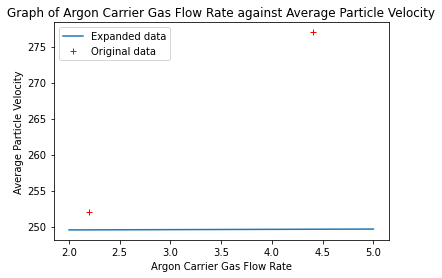

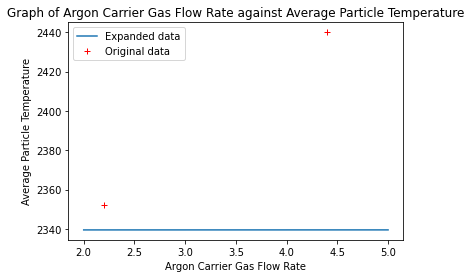

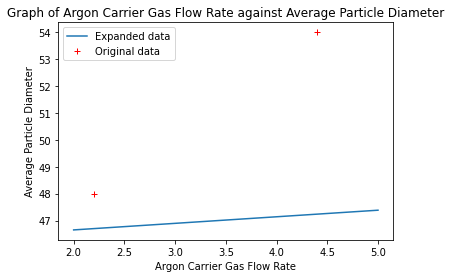

In [8]:
plt.plot(interpolated_dataset.iloc[581: 585, 3], interpolated_dataset.iloc[581: 585, 6])
plt.plot([2.2, 4.4], [252, 277], 'r+')
plt.xlabel("Argon Carrier Gas Flow Rate")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Argon Carrier Gas Flow Rate against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[581: 585, 3], interpolated_dataset.iloc[581: 585, 7])
plt.plot([2.2, 4.4], [2352, 2440], 'r+')
plt.xlabel("Argon Carrier Gas Flow Rate")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Argon Carrier Gas Flow Rate against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[581: 585, 3], interpolated_dataset.iloc[581: 585, 8])
plt.plot([2.2, 4.4], [48, 54], 'r+')
plt.xlabel("Argon Carrier Gas Flow Rate")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Argon Carrier Gas Flow Rate against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

# Injector Stand-off Distance Against All Outputs

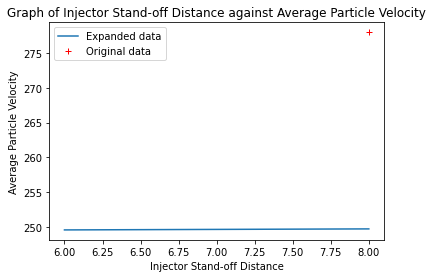

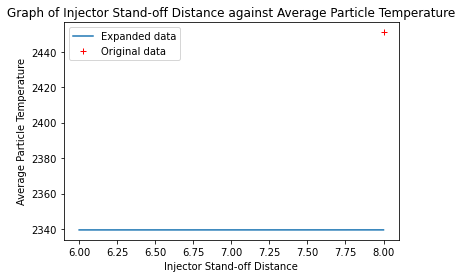

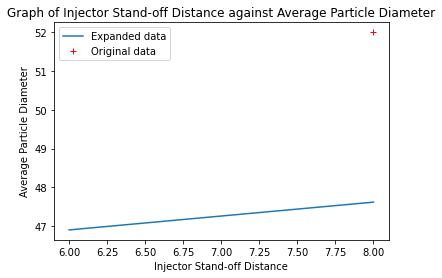

In [9]:
plt.plot(interpolated_dataset.iloc[585: 588, 4], interpolated_dataset.iloc[585: 588, 6])
plt.plot([8], [278], 'r+')
plt.xlabel("Injector Stand-off Distance")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Injector Stand-off Distance against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[585: 588, 4], interpolated_dataset.iloc[585: 588, 7])
plt.plot([8], [2451], 'r+')
plt.xlabel("Injector Stand-off Distance")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Injector Stand-off Distance against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[585: 588, 4], interpolated_dataset.iloc[585: 588, 8])
plt.plot([8], [52], 'r+')
plt.xlabel("Injector Stand-off Distance")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Injector Stand-off Distance against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

#  Injector Distance Against All Outputs

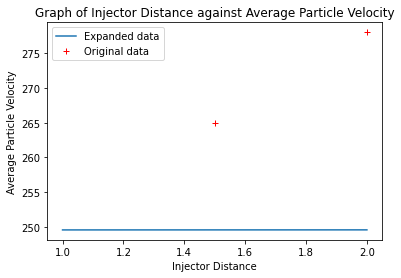

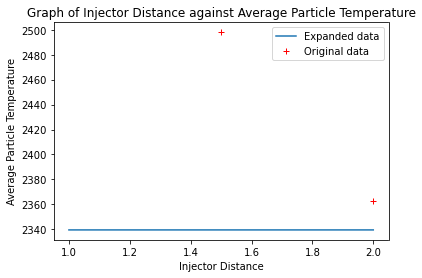

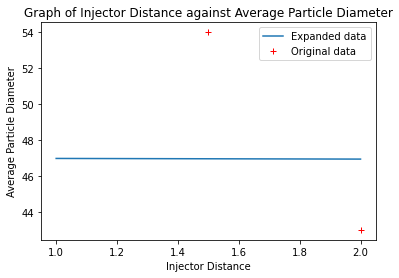

In [10]:
plt.plot(interpolated_dataset.iloc[588: 590, 5], interpolated_dataset.iloc[588: 590, 6])
plt.plot([1.5, 2], [265, 278], 'r+')
plt.xlabel("Injector Distance")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Injector Distance against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[588: 590, 5], interpolated_dataset.iloc[588: 590, 7])
plt.plot([1.5, 2], [2498, 2363], 'r+')
plt.xlabel("Injector Distance")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Injector Distance against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[588: 590, 5], interpolated_dataset.iloc[588: 590, 8])
plt.plot([1.5, 2], [54, 43], 'r+')
plt.xlabel("Injector Distance")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Injector Distance against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()